In [27]:
import os

for dirpath, dirnames, filenames in os.walk("archive"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} .")

There are 3 directories and 0 images in archive .
There are 1 directories and 0 images in archive\seg_pred .
There are 0 directories and 7301 images in archive\seg_pred\seg_pred .
There are 6 directories and 0 images in archive\seg_test .
There are 0 directories and 437 images in archive\seg_test\buildings .
There are 0 directories and 474 images in archive\seg_test\forest .
There are 0 directories and 553 images in archive\seg_test\glacier .
There are 0 directories and 525 images in archive\seg_test\mountain .
There are 0 directories and 510 images in archive\seg_test\sea .
There are 0 directories and 501 images in archive\seg_test\street .
There are 6 directories and 0 images in archive\seg_train .
There are 0 directories and 2191 images in archive\seg_train\buildings .
There are 0 directories and 2271 images in archive\seg_train\forest .
There are 0 directories and 2404 images in archive\seg_train\glacier .
There are 0 directories and 2512 images in archive\seg_train\mountain .
Ther

### Get classnames from dir

In [28]:
import pathlib
import numpy as np

data_dir = pathlib.Path("archive/seg_train/")  
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # make list of class names from subdirectory
print(class_names)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [ ]:
# easier way 
#class_names = os.listdir('archive/seg_test/')  
#class_names

### Viewing img

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

#function for random images
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")
    return img


Image shape: (150, 150, 3)


array([[[246, 244, 245],
        [250, 248, 249],
        [253, 251, 252],
        ...,
        [207, 217, 244],
        [203, 212, 243],
        [203, 212, 243]],

       [[251, 249, 250],
        [253, 251, 252],
        [255, 253, 254],
        ...,
        [208, 216, 239],
        [205, 212, 238],
        [206, 213, 241]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [221, 224, 241],
        [219, 222, 241],
        [218, 221, 240]],

       ...,

       [[129, 119,  84],
        [ 99,  91,  54],
        [114, 111,  66],
        ...,
        [134, 120,  83],
        [101,  97,  49],
        [119, 119,  65]],

       [[126, 114,  72],
        [ 86,  77,  36],
        [ 93,  88,  48],
        ...,
        [104,  88,  54],
        [183, 176, 130],
        [111, 109,  58]],

       [[108,  97,  51],
        [106,  98,  52],
        [ 91,  86,  48],
        ...,
        [178, 162, 128],
        [184, 175, 132],
        [151, 147,  99]]

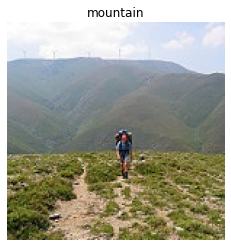

In [30]:
view_random_image("archive/seg_test/", "mountain")

### Data preprocessing

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessor for image data 

train_datagen = ImageDataGenerator(rescale=1.0/255.0)      # image pixel values normalized (between 0-1)  
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
pred_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_dir = "archive/seg_train/"
test_dir = "archive/seg_test/"
pred_dir = "archive/seg_pred/seg_pred/"


train_data = train_datagen.flow_from_directory(train_dir, batch_size= 32, 
                                               target_size=(150,150), 
                                               class_mode= "categorical",  
                                               seed = 7)

test_data = test_datagen.flow_from_directory(test_dir, batch_size= 32, 
                                               target_size=(150,150), 
                                               class_mode= "categorical",  
                                               seed = 7)

pred_data = pred_datagen.flow_from_directory(pred_dir, batch_size= 32, 
                                               target_size=(150,150), 
                                               class_mode= "categorical",  
                                               seed = 7)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 0 images belonging to 0 classes.


#### adding early stopping callback

In [31]:
from tensorflow.keras import callbacks
import pandas as pd

In [32]:
early_stopping = callbacks.EarlyStopping(min_delta = 0.001,
                                        patience = 3,
                                        restore_best_weights = True)

### Model (try #1)
-- decent, cant upload to GitHub. Saved model exceeds file size limit :(

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=(150, 150, 3)),   
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"),
    tf.keras.layers.MaxPool2D(), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(6, activation= "softmax") 
])

In [68]:
model.compile(loss="binary_crossentropy",   
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [69]:
history = model.fit(train_data, epochs=15, 
                        #steps_per_epoch=len(train_data),
                        validation_data= test_data,
                        #validation_steps= len(test_data),
                        callbacks=[early_stopping])

Epoch 1/15
439/439 [==============================] - 69s 156ms/step - loss: 0.2635 - accuracy: 0.6450 - val_loss: 0.2017 - val_accuracy: 0.7570
Epoch 2/15
439/439 [==============================] - 19s 44ms/step - loss: 0.1713 - accuracy: 0.7934 - val_loss: 0.1697 - val_accuracy: 0.7980
Epoch 3/15
439/439 [==============================] - 20s 45ms/step - loss: 0.1159 - accuracy: 0.8672 - val_loss: 0.1855 - val_accuracy: 0.7867
Epoch 4/15
439/439 [==============================] - 20s 46ms/step - loss: 0.0634 - accuracy: 0.9339 - val_loss: 0.2081 - val_accuracy: 0.8003
Epoch 5/15
439/439 [==============================] - 20s 46ms/step - loss: 0.0334 - accuracy: 0.9692 - val_loss: 0.2372 - val_accuracy: 0.7897
Epoch 6/15
439/439 [==============================] - 23s 51ms/step - loss: 0.0197 - accuracy: 0.9833 - val_loss: 0.2878 - val_accuracy: 0.7993
Epoch 7/15
439/439 [==============================] - 23s 53ms/step - loss: 0.0131 - accuracy: 0.9890 - val_loss: 0.3217 - val_accuracy

In [70]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.263500,0.645005,0.201659,0.757000
1,0.171276,0.793359,0.169712,0.798000
2,0.115873,0.867180,0.185537,0.786667
3,0.063362,0.933946,0.208095,0.800333
4,0.033439,0.969218,0.237203,0.789667
5,0.019656,0.983326,0.287765,0.799333
6,0.013060,0.988955,0.321727,0.801333


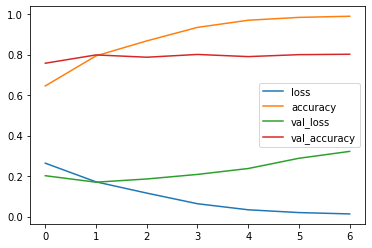

In [71]:
hist_df.plot();

In [72]:
model.evaluate(test_data)

94/94 [==============================] - 3s 26ms/step - loss: 0.1697 - accuracy: 0.7980


[0.1697111427783966, 0.7979999780654907]

### Transfer learning (using VGG16)
try #2

In [1]:
from tensorflow.keras.applications import VGG16

In [16]:
base_model = VGG16(include_top= False,
                   weights = 'imagenet',
                   input_shape = (150,150,3))

base_model.trainable = False  

In [17]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(6, activation="softmax")
])

In [18]:
model.compile(loss="categorical_crossentropy",   
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### Training Model

In [19]:
history = model.fit(train_data, epochs=10, 
                        validation_data= test_data,
                        callbacks=[early_stopping])

Epoch 1/10
439/439 [==============================] - 62s 139ms/step - loss: 0.4614 - accuracy: 0.8302 - val_loss: 0.4043 - val_accuracy: 0.8497
Epoch 2/10
439/439 [==============================] - 61s 139ms/step - loss: 0.2978 - accuracy: 0.8903 - val_loss: 0.3523 - val_accuracy: 0.8673
Epoch 3/10
439/439 [==============================] - 61s 139ms/step - loss: 0.2297 - accuracy: 0.9120 - val_loss: 0.3563 - val_accuracy: 0.8677
Epoch 4/10
439/439 [==============================] - 61s 139ms/step - loss: 0.1825 - accuracy: 0.9310 - val_loss: 0.3280 - val_accuracy: 0.8830
Epoch 5/10
439/439 [==============================] - 61s 140ms/step - loss: 0.1527 - accuracy: 0.9435 - val_loss: 0.4031 - val_accuracy: 0.8677
Epoch 6/10
439/439 [==============================] - 61s 140ms/step - loss: 0.1177 - accuracy: 0.9568 - val_loss: 0.4341 - val_accuracy: 0.8637
Epoch 7/10
439/439 [==============================] - 62s 140ms/step - loss: 0.1069 - accuracy: 0.9600 - val_loss: 0.4159 - val_ac

In [20]:
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.461377,0.830198,0.404300,0.849667
1,0.297831,0.890266,0.352329,0.867333
2,0.229725,0.911999,0.356263,0.867667
3,0.182495,0.931025,0.328020,0.883000
4,0.152673,0.943494,0.403140,0.867667
5,0.117685,0.956819,0.434081,0.863667
6,0.106936,0.959954,0.415858,0.877000


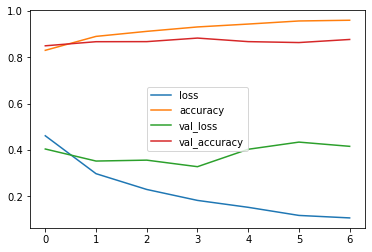

In [21]:
hist_df.plot();

In [22]:
model.evaluate(test_data)

94/94 [==============================] - 11s 116ms/step - loss: 0.3280 - accuracy: 0.8830


[0.3280205726623535, 0.8830000162124634]

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
Total params: 16,845,766
Trainable params: 2,131,078
Non-trainable params: 14,714,688
_________________________________________________________________


### Saving model

In [23]:
model.save("best_model.keras")